## 1. Introduction

### Objective

The goal of this project is to analyze the impact of the presence of **brand names** in **search queries** on the **purchase rate** (`pur_purchase_rate`), and to build a **purchase rate prediction model** based on this analysis.

Through **exploratory data analysis (EDA)**, we will investigate the relationship between **search queries containing brand names** and **purchase rates**. The hypothesis is that **search queries containing brand names** will have a stronger impact on the purchase rate compared to queries without brand names. Based on this, we will build a **purchase rate prediction model** using the presence of brand names and other variables. 

The ultimate goal is to **predict the likelihood of a purchase** based on **search queries**.


### Problem Definition

This project focuses on analyzing the impact of the presence of **brand names** in **search queries** on the **purchase rate** and building a **purchase rate prediction model** based on this analysis. The project will proceed through the following steps:

1. **Conversion Keyword Extraction**: Using the **TF-IDF (Term Frequency-Inverse Document Frequency)** method, important keywords will be extracted from the search query, helping identify **conversion keywords** that are more likely to result in purchases. By examining the weight of terms in the search queries, we will pinpoint which keywords drive higher purchase rates, including the impact of brand names.

2. **Analyzing the impact of brand names on purchase rate**: We will analyze whether **search queries containing brand names** have a stronger influence on the **purchase rate** compared to queries without brand names. This will help us understand the relationship between **brand name presence** and **purchase rate**.

3. **Classifying search queries**: After verifying the impact of brand names, we will build a **classification model** to differentiate between **search queries with brand names** and **search queries without brand names**. We will combine this information with other variables to create a model that predicts the **purchase rate**.

4. **Purchase Rate Prediction**: A machine learning model will be developed to predict the purchase rate (`pur_purchase_rate`), estimating the likelihood that a search query will lead to a purchase. This model will integrate the identified conversion keywords and brand name presence, along with other variables, to predict **purchase likelihood** more accurately.




### Dataset Description

**Source**: This dataset is sourced from the Kaggle page [Amazon Advertising Performance Metrics](https://www.kaggle.com/datasets/mayuriawati/amazon-advertising-performance-metrics/data), which includes performance metrics related to Amazon's advertising campaigns. The dataset provides detailed information on search queries, click counts, cart interactions, and purchase rates related to online advertisements.

**Key Variables**:

```search_query```: Specific keywords or phrases used by customers when searching for products on Amazon.  
```pur_purchase_rate```: The percentage of times the advertisement resulted in a customer making a purchase.  
```clk_click_rate```: The percentage of times the advertisement was clicked on relative to the number of times it was displayed.  
```imp_total_count```: The total number of times the advertisement was displayed to customers in search results or on product pages.  
```clk_total_count```: The total number of clicks on the advertisement.  
```cart_add_rate```: The percentage of times the advertisement resulted in a product being added to a customer's cart.  
```cart_total_count```: The total number of times customers added a product to their cart after clicking on the advertisement.  


## 2. Data Preparation and Preprocessing

### 2.1 Initial Observation

#### Dataset Overview

In [ ]:
import pandas as pd

# Loading Data
# Make sure that the data file is in the same directory as the code file before running the code.

df = pd.read_csv('week_data.csv')
df

#### Data Structure

In [2]:

print("Number of rows and columns:", df.shape) # Check the basic information of the dataset
print("Column names and data types:")
print(df.dtypes)


print("First 5 rows of the dataset:") a# Preview the first few rows of the dataset
print(df.head())


print("Descriptive statistics:") # Summary statistics of the dataset
print(df.describe())


print("Dataset information:") # Dataset info (data types, missing values, etc.)
print(df.info())


Number of rows and columns: (2589, 19)
Column names and data types:
week                   object
search_query           object
search_query_score      int64
search_quey_volume      int64
imp_total_count         int64
imp_ASIN_count          int64
imp_ASIN_share        float64
clk_total_count         int64
clk_click_rate        float64
clk_ASIN_count          int64
clk_ASIN_share        float64
cart_total_count        int64
cart_add_rate         float64
cart_ASIN_count         int64
cart_ASIN_share       float64
pur_total_count         int64
pur_purchase_rate     float64
pur_ASIN_count          int64
pur_ASIN_share         object
dtype: object
First 5 rows of the dataset:
     week                        search_query  search_query_score  \
0  Week 3                        sensory toys                   1   
1  Week 3  sensory toys for autistic children                   2   
2  Week 3           sensory toys for kids 5-7                   3   
3  Week 3                 autism sensory to

In [3]:
null_percentage = (df['pur_ASIN_share'].isnull().sum() / len(df)) * 100
null_percentage = round(null_percentage, 2)
print(f"Percentage of null values in 'pur_ASIN_share': {null_percentage}%")

Percentage of null values in 'pur_ASIN_share': 0.54%


### 2.2 Data Processing

In [4]:
# Missing Data
# Most of the data is non-null, and the 'pur_ASIN_share' column, which is the only one containing null values, has less than 1% null values. Therefore, we will drop all rows with null data.
df = df.dropna()

In [5]:
# Duplicate Check
duplicates = df.duplicated().sum() 
print("Number of Duplicates: ",duplicates)

Number of Duplicates:  0


In [6]:
# CHECKING DATA IS CORRECT 

# Based on a sample of data used for calculation, 'clk_click_rate' is calculated using the 'search_quey_volume' and 'clk_total_count' columns.
# 'cart_add_rate' is calculated using 'search_query_volume' and 'cart_total_count'. 
# 'pur_purchase_rate' is calculated using 'search_query_volume' and 'pur_total_count'.

df.loc[:, 'CTR'] = df['clk_total_count'] / df['search_quey_volume'] * 100 # Click Through Rate = clk_total_count / search_query_volume * 100
df.loc[:, 'CTR'] = df['CTR'].round(2)
difference_count = (df.loc[:, 'clk_click_rate'] != df.loc[:, 'CTR']).sum() # Count the number of rows where 'clk_click_rate' and 'CTR' are different


print(difference_count) # Ignore the warning message


1990


C:\Users\EunseoS\AppData\Local\Temp\ipykernel_32168\3171575881.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'CTR'] = df['clk_total_count'] / df['search_quey_volume'] * 100 # Click Through Rate = clk_total_count / search_query_volume * 100


In [7]:
differences = df[df['clk_click_rate'] != df['CTR']]
print(differences)

         week                        search_query  search_query_score  \
124    Week 2               sensory stretchy toys                  25   
600   Week 49                        sensory toys                   1   
601   Week 49  sensory toys for autistic children                   2   
602   Week 49          autistic toys for boys 5-7                   3   
603   Week 49  toys for autistic children age 5-7                   4   
...       ...                                 ...                 ...   
2584  Week 30             crazy glow bungee bandz                  96   
2585  Week 30  squishy toys for autistic children                  97   
2586  Week 30                         chew fidget                  98   
2587  Week 30       huggy wuggy leg stretchy toys                  99   
2588  Week 30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
124                   32              858     

- Upon inspecting the data, we identified calculation errors in several rows. For example, row 124 contains a rounding error, and row 600 has a decimal point notation error.  
- We will replace the values in these rows with the newly calculated CTR values and update the original `clk_click_rate` column accordingly. After updating the `clk_click_rate` column, we will delete the `CTR` column as it is no longer needed.


In [8]:
df.loc[df['clk_click_rate'] != df['CTR'], 'clk_click_rate'] = df.loc[df['clk_click_rate'] != df['CTR'], 'CTR'].values # Replace 'clk_click_rate' values with the newly calculated 'CTR' values for the rows with differences
df = df.drop(columns=['CTR'])

- Apply the same logic to the ```cart_add_rate``` column and ```pur_purchase_rate``` as well.

In [9]:
# cart_add_rate = cart_total_count / search_query_volume * 100
# ATC(Add To Cart): The percentage of website visitors who add an item to their cart
df.loc[:, 'ATC'] = df['cart_total_count'] / df['search_quey_volume'] * 100

df.loc[:, 'ATC'] = df['ATC'].round(2) 

difference_count = (df['cart_add_rate'] != df['ATC']).sum() 

print(difference_count) 

1989


In [10]:
differences = df[df['cart_add_rate'] != df['ATC']]
print(differences)

         week                        search_query  search_query_score  \
600   Week 49                        sensory toys                   1   
601   Week 49  sensory toys for autistic children                   2   
602   Week 49          autistic toys for boys 5-7                   3   
603   Week 49  toys for autistic children age 5-7                   4   
604   Week 49                  bunmo sensory toys                   5   
...       ...                                 ...                 ...   
2584  Week 30             crazy glow bungee bandz                  96   
2585  Week 30  squishy toys for autistic children                  97   
2586  Week 30                         chew fidget                  98   
2587  Week 30       huggy wuggy leg stretchy toys                  99   
2588  Week 30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
600               132795          3017056     

- Upon inspecting the data, we identified calculation errors in several rows. For example, row 600 has a decimal point notation error and row 2584 shows a calculation error.
- We will replace the values in these rows with the newly calculated ATC values and update the original `cart_add_rate` column accordingly. After updating the `cart_add_rate` column, we will delete the `ATC` column as it is no longer needed.

In [11]:
df.loc[df['cart_add_rate'] != df['ATC'], 'cart_add_rate'] = df.loc[df['cart_add_rate'] != df['ATC'], 'ATC'].values
df = df.drop(columns=['ATC'])

In [12]:
# pur_purchase_rate = pur_total_count / search_query_volume  * 100 
df.loc[:, 'PUR'] = df['pur_total_count'] / df['search_quey_volume'] * 100
df.loc[:, 'PUR'] = df['PUR'].round(2)
difference_count = (df.loc[:, 'pur_purchase_rate'] != df.loc[:, 'PUR']).sum()
print(difference_count)

1810


In [13]:
differences = df[df['pur_purchase_rate'] != df['PUR']]
print(differences)

         week                        search_query  search_query_score  \
124    Week 2               sensory stretchy toys                  25   
600   Week 49                        sensory toys                   1   
601   Week 49  sensory toys for autistic children                   2   
602   Week 49          autistic toys for boys 5-7                   3   
603   Week 49  toys for autistic children age 5-7                   4   
...       ...                                 ...                 ...   
2578  Week 30            sensory items for adults                  90   
2580  Week 30                   sensory materials                  92   
2581  Week 30            toddler chew toy sensory                  93   
2583  Week 30                     alzheimers toys                  95   
2586  Week 30                         chew fidget                  98   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
124                   32              858     

- Upon inspecting the data, we identified calculation errors in several rows. For example, row 124 ontains a rounding error, and row 600 has a decimal point notation error.  
- We will replace the values in these rows with the newly calculated PUR values and update the original `pur_purchase_rate` column accordingly. After updating the `pur_purchase_rate` column, we will delete the `PUR` column as it is no longer needed.

In [14]:
df.loc[df['pur_purchase_rate'] != df['PUR'], 'pur_purchase_rate'] = df.loc[df['pur_purchase_rate'] != df['PUR'], 'PUR'].values
df = df.drop(columns=['PUR'])

In [15]:
# Cleaning up outliers('rate' column)
# Since the 'rate' columns represent percentages, their values should logically not exceed 100. However, after inspecting the data using describe(), values exceeding 100 were found, indicating the need for data correction.
over_100_rows = df[(df['clk_click_rate'] > 100) | 
                   (df['cart_add_rate'] > 100) | 
                   (df['pur_purchase_rate'] > 100)]

print(over_100_rows)

         week                        search_query  search_query_score  \
54     Week 3  learning toys for kids with autism                  55   
127    Week 2                        stim noodles                  28   
151    Week 2           stretchy toy for toddlers                  52   
153    Week 2                         fidgets asd                  54   
159    Week 2                   todler autism toy                  60   
...       ...                                 ...                 ...   
2583  Week 30                     alzheimers toys                  95   
2584  Week 30             crazy glow bungee bandz                  96   
2585  Week 30  squishy toys for autistic children                  97   
2587  Week 30       huggy wuggy leg stretchy toys                  99   
2588  Week 30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
54                    41             1074     

- A total of 537 rate outliers were found. This could occur due to a mismatch between search_query_volume and actual behavior (e.g., multiple products being shown for the same query), or due to missing or duplicated data in `search_query_volume`. This observation suggests there may be issues with the data collection for the `search_query_volume` column.
- To preserve the data, we will apply clipping to the rate columns, limiting their values to 100.

In [16]:
# Clip the values of rate columns (clk_click_rate, cart_add_rate, pur_purchase_rate) to 100
df['clk_click_rate'] = df['clk_click_rate'].clip(upper=100)
df['cart_add_rate'] = df['cart_add_rate'].clip(upper=100)
df['pur_purchase_rate'] = df['pur_purchase_rate'].clip(upper=100)

In [17]:
df.describe()

,search_query_score,search_quey_volume,imp_total_count,imp_ASIN_count,imp_ASIN_share,clk_total_count,clk_click_rate,clk_ASIN_count,clk_ASIN_share,cart_total_count,cart_add_rate,cart_ASIN_count,cart_ASIN_share,pur_total_count,pur_purchase_rate,pur_ASIN_count
count,2575.000000,2.575000e+03,2.575000e+03,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,50.455534,5.855398e+03,1.513293e+05,390.249709,0.451757,1647.321165,58.924478,4.864466,4.090996,514.140194,31.258318,2.701748,5.977720,130.405825,15.321379,1.043107
std,28.786616,7.639875e+04,1.785279e+06,2066.258584,1.045654,14526.554816,32.195466,20.433603,15.875465,4753.796453,29.971710,10.354984,19.874344,1813.030974,27.265076,3.364898
min,1.000000,1.000000e+00,1.400000e+01,1.000000,0.000000,1.000000,5.330000,0.000000,0.000000,1.000000,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.200000e+01,5.385000e+02,10.000000,0.007200,9.000000,29.155000,1.000000,0.011300,4.000000,8.640000,1.000000,0.022700,1.000000,1.450000,0.000000
50%,50.000000,1.340000e+02,5.053000e+03,60.000000,0.017800,67.000000,48.310000,2.000000,0.076900,21.000000,18.420000,1.000000,0.166700,5.000000,3.720000,1.000000
75%,75.000000,8.530000e+02,3.018950e+04,243.500000,0.064850,374.500000,100.000000,3.000000,0.880000,111.000000,44.435000,2.000000,1.000000,21.500000,12.285000,1.000000
max,100.000000,3.313904e+06,7.767592e+07,47625.000000,11.110000,570036.000000,100.000000,574.000000,100.000000,184445.000000,100.000000,301.000000,100.000000,76767.000000,100.000000,103.000000


In [18]:
# Delete unnecessary columns
columns_to_drop = [ 'imp_ASIN_count', 'imp_ASIN_share', 
                   'clk_ASIN_count', 'clk_ASIN_share', 'cart_ASIN_count', 
                   'cart_ASIN_share', 'pur_ASIN_count', 'pur_ASIN_share']

df.drop(columns=columns_to_drop, inplace=True)
df

,week,search_query,search_query_score,search_quey_volume,imp_total_count,clk_total_count,clk_click_rate,cart_total_count,cart_add_rate,pur_total_count,pur_purchase_rate
0,Week 3,sensory toys,1,35253,815103,9358,26.55,2899,8.22,526,1.49
1,Week 3,sensory toys for autistic children,2,23354,509901,7784,33.33,2086,8.93,325,1.39
2,Week 3,sensory toys for kids 5-7,3,6531,141188,1812,27.74,550,8.42,116,1.78
3,Week 3,autism sensory toys,4,6932,149596,1829,26.38,559,8.06,95,1.37
4,Week 3,autism sensory products,5,4218,85699,1173,27.81,286,6.78,16,0.38
...,...,...,...,...,...,...,...,...,...,...,...
2584,Week 30,crazy glow bungee bandz,96,2,85,3,100.00,1,50.00,0,0.00
2585,Week 30,squishy toys for autistic children,97,2,429,19,100.00,5,100.00,0,0.00
2586,Week 30,chew fidget,98,43,4249,43,100.00,19,44.19,3,6.98
2587,Week 30,huggy wuggy leg stretchy toys,99,1,38,2,100.00,1,100.00,0,0.00


### 2.3 EDA

#### Distribution and Relationships of Key Variables(`clk_click_rate`, `cart_add_rate`, `pur_purchase_rate`)

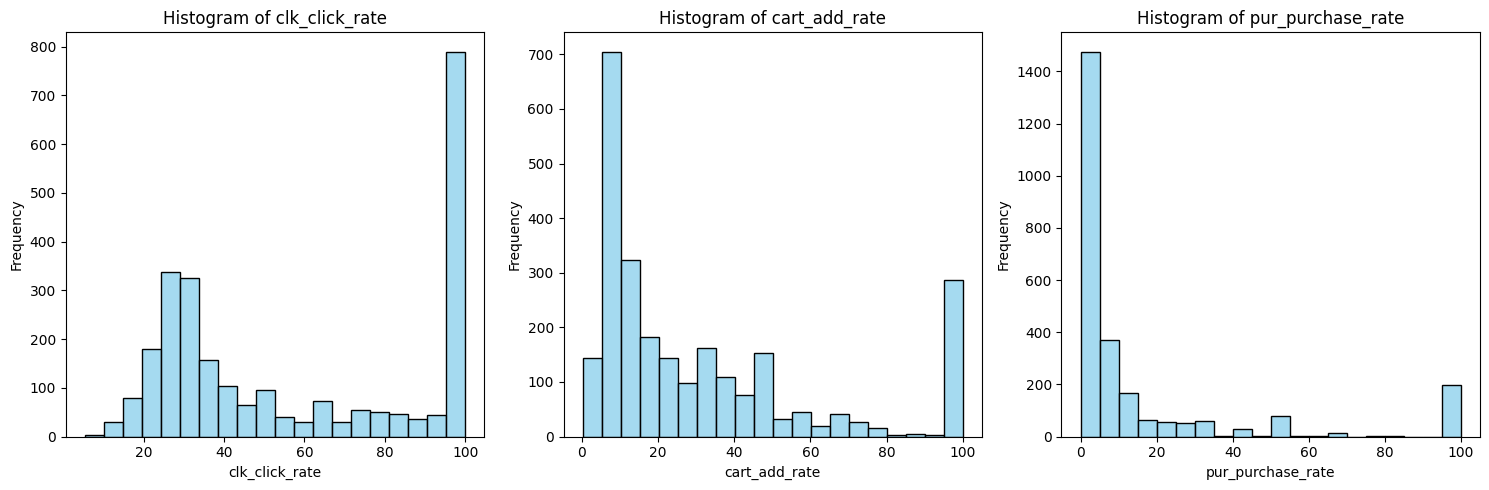

In [37]:
#Distribution of Click Rate, Cart Add Rate, and Purchase Rate
import matplotlib.pyplot as plt
import seaborn as sns

# List of the metrics to plot
metrics = ['clk_click_rate', 'cart_add_rate', 'pur_purchase_rate']

# Create subplots: 1 row, 3 columns
plt.figure(figsize=(15, 5))

# Loop over the metrics and plot each one
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)  # (rows, columns, position)
    sns.histplot(df[metric], kde=False, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {metric}")
    plt.xlabel(f"{metric}")
    plt.ylabel("Frequency")

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()



- The three key metrics ('clk_click_rate', 'cart_add_rate', 'pur_purchase_rate') all show **skewed distributions**.
- While the click rate is predominantly in the 90-100% range, the cart add rate and purchase rate are mostly in the 0-20% range.

#### Correlation between key metrics (`clk_click_rate`, `cart_add_rate`, `pur_purchase_rate`)

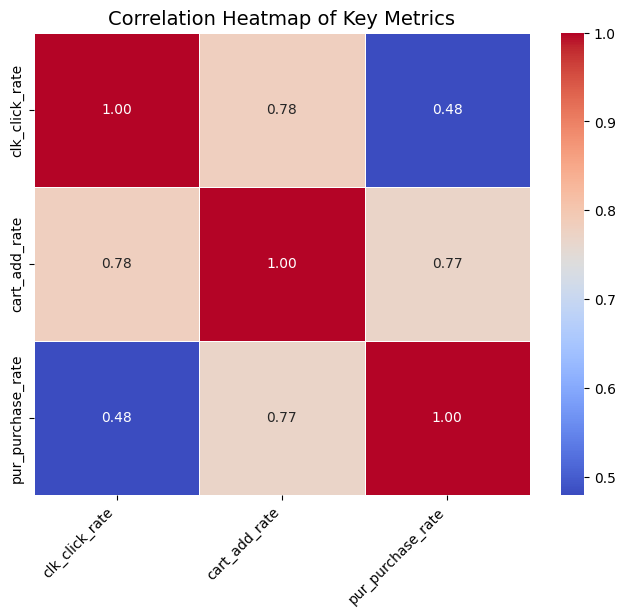

In [42]:
correlation_columns = ['clk_click_rate', 'cart_add_rate', 'pur_purchase_rate']
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate by 45 degrees and align to the right

plt.title("Correlation Heatmap of Key Metrics", fontsize=14)
plt.show()


- From the heatmap, we can see that the `clk_click_rate` and `cart_add_rate` show a **strong positive correlation**, while the `pur_purchase_rate` exhibits a **moderate positive correlation** with the other two metrics. This suggests that there is a certain relationship between the variables, but other factors (in this case, the `cart add rate`) could also influence the outcome.

#### Word Count, Frequency Analysis, and Query Duplication in ```Search Queries```

count    2575.000000
mean        3.921553
std         2.889452
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        49.000000
Name: word_count, dtype: float64
Top 10 Frequent Words: [('toys', 1486), ('sensory', 1056), ('for', 879), ('autism', 452), ('fidget', 340), ('kids', 316), ('autistic', 256), ('stretchy', 251), ('bunmo', 207), ('children', 179), ('textured', 169), ('toy', 161), ('5-7', 136), ('strings', 133), ('adults', 108), ('special', 101), ('needs', 92), ('with', 87), ('chew', 86), ('noodles', 82)]
Number of Low Frequency Words: 360
Duplicate Query Counts:
search_query
autism sensory toys                   26
autism sensory products               26
autism toys                           26
sensory toys for autistic children    25
bunmo sensory toys                    25
autistic toys for boys 5-7            25
toys for autistic children age 5-7    25
sensory toys                          24
stretchy toys                         24
sen

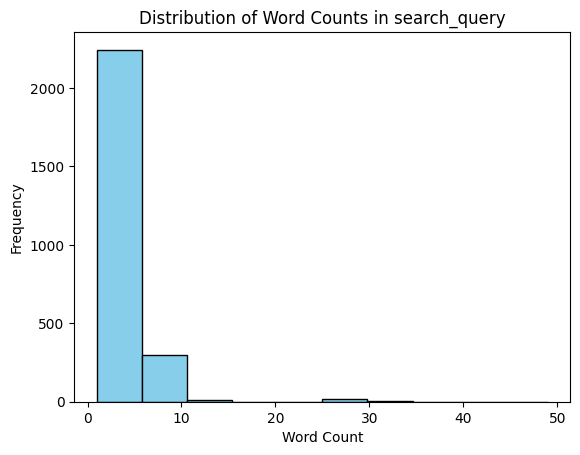

In [38]:
from collections import Counter

# 1. Analyze the number of words in each search query
df['word_count'] = df['search_query'].apply(lambda x: len(x.split()))

word_count_stats = df['word_count'].describe()  # Displays mean, min, max, etc.
print(word_count_stats)

# 2. Analyze high-frequency and low-frequency words
all_words = ' '.join(df['search_query']).split() # Split all search queries into individual words
word_freq = Counter(all_words)

high_freq_words = word_freq.most_common(20) # High-frequency words
print("Top 10 Frequent Words:", high_freq_words)

low_freq_words = [word for word, freq in word_freq.items() if freq == 1] # Low-frequency words
print("Number of Low Frequency Words:", len(low_freq_words))

# 3. Analyze duplicate search query frequencies
query_freq = df['search_query'].value_counts()
print("Duplicate Query Counts:")
print(query_freq.head(10))  # Displays the top 10 duplicate search queries

plt.hist(df['word_count'], bins=10, color='skyblue', edgecolor='black') # Visualization
plt.title("Distribution of Word Counts in search_query")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


#### Extract important keywords using TF-IDF method

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')  # Removing English stopwords
X_tfidf = vectorizer.fit_transform(df['search_query'])

# Extracting words and their corresponding TF-IDF scores
tfidf_df = pd.DataFrame(X_tfidf.T.toarray(), index=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.T  

# Extracting the most important words based on the highest TF-IDF score in each query
top_tfidf_words = tfidf_df.max(axis=1).sort_values(ascending=False).head(30) 

# Extracting the actual words corresponding to the highest TF-IDF scores and their scores
top_keyword_words_with_scores = []
for i in top_tfidf_words.index:
    max_index = tfidf_df.loc[i].idxmax() 
    score = tfidf_df.loc[i, max_index] 
    top_keyword_words_with_scores.append((max_index, score))  


top_keyword_words_with_scores_unique = list(set(top_keyword_words_with_scores))

print("Top 30 Unique Keywords with Highest TF-IDF Scores:")
for word, score in top_keyword_words_with_scores_unique:
    print(f"{word}: {score:.4f}")  


Top 30 Unique Keywords with Highest TF-IDF Scores:
bunmo: 1.0000
figetget: 1.0000
autism: 1.0000
fidget: 1.0000
vibe: 1.0000
theraputty: 1.0000
sensory: 1.0000
speks: 1.0000
slinky: 1.0000
stretchlerz: 1.0000
flipazoo: 1.0000
b082d7wvt8: 1.0000
noodlies: 1.0000


- Possible Reasons for Getting Only 13 Results Instead of 30 in the Deduplicated TF-IDF List:
    - **Fewer than 30 unique top words or similar TF-IDF scores**: It could be that there are fewer than 30 unique words with significant TF-IDF scores, or that the remaining words have very similar TF-IDF scores, thus preventing the list from reaching 30 distinct terms. This suggests that the search queries contain few significant keywords or that the repeated keywords are very similar.

    - **Short search queries or data focused on a specific topic**: Looking at the text characteristics, most search queries consist of 5 words or fewer, and the frequency and TF-IDF lists show a concentration on specific topics, such as 'kids', 'autism', 'sensory', etc. This indicates that the data might be highly focused on a few themes.

    - **Limited amount of data**: The dataset contains only around 2600 entries, which may not be enough to generate a wide variety of significant keywords.
 
- Also, **specific brand names** such as Bunmo, Speks, Flipazoo and Theraputty were observed.

#### Analysis between keywords and key metrics(average click rate, cart add rate, and purchase rate)

In [25]:
# Analyzing the relationship between keywords and key metrics
# Dictionary to store the average purchase rate, click rate, and cart add rate for keywords based on TF-IDF 
rates_by_keyword = {}

# Iterate through the words in the top_keyword_words_with_scores_unique list
for word, _ in top_keyword_words_with_scores_unique:
    
    filtered_queries = df[df['search_query'].str.contains(word, case=False, na=False)] # Filter queries that contain the word (queries where the word is included)
    
    
    if not filtered_queries.empty: # Calculate the average purchase rate, click rate, and cart add rate for the filtered queries
        avg_purchase_rate = filtered_queries['pur_purchase_rate'].mean()
        avg_click_rate = filtered_queries['clk_click_rate'].mean()
        avg_cart_add_rate = filtered_queries['cart_add_rate'].mean()
    else:
        avg_purchase_rate = avg_click_rate = avg_cart_add_rate = None # Set to None if no queries are found
    
    
    rates_by_keyword[word] = { # Store the results in the dictionary
        'purchase_rate': avg_purchase_rate,
        'click_rate': avg_click_rate,
        'cart_add_rate': avg_cart_add_rate
    }


for word, rates in rates_by_keyword.items():
    print(f"Results for Queries Containing '{word}':")
    
    if rates['click_rate'] is not None:
        print(f"  Average Click Rate: {rates['click_rate']:.4f}")
    else:
        print(f"  Average Click Rate: No Queries Found")
        
    if rates['cart_add_rate'] is not None:
        print(f"  Average Cart Add Rate: {rates['cart_add_rate']:.4f}")
    else:
        print(f"  Average Cart Add Rate: No Queries Found")
        
    if rates['purchase_rate'] is not None:
        print(f"  Average Purchase Rate: {rates['purchase_rate']:.4f}")
    else:
        print(f"  Average Purchase Rate: No Queries Found")
    
    print() 


Results for Queries Containing 'bunmo':
  Average Click Rate: 80.7253
  Average Cart Add Rate: 65.2301
  Average Purchase Rate: 47.6106

Results for Queries Containing 'figetget':
  Average Click Rate: 45.2700
  Average Cart Add Rate: 12.8450
  Average Purchase Rate: 0.6700

Results for Queries Containing 'autism':
  Average Click Rate: 55.5617
  Average Cart Add Rate: 27.6650
  Average Purchase Rate: 12.1771

Results for Queries Containing 'fidget':
  Average Click Rate: 67.3369
  Average Cart Add Rate: 37.3549
  Average Purchase Rate: 19.8172

Results for Queries Containing 'vibe':
  Average Click Rate: 49.7500
  Average Cart Add Rate: 16.1487
  Average Purchase Rate: 7.7273

Results for Queries Containing 'theraputty':
  Average Click Rate: 61.5550
  Average Cart Add Rate: 18.9075
  Average Purchase Rate: 7.0175

Results for Queries Containing 'sensory':
  Average Click Rate: 62.3201
  Average Cart Add Rate: 36.4215
  Average Purchase Rate: 18.6495

Results for Queries Containing 's

### 3. Hypothesis Developmen

#### 3.1 Identified Patterns

- TF-IDF 통해 키워드 확인했을 때 브랜드 이름, 제품 분류, 특정 제품 이름이 눈에 띔.
- 브랜드 키워드가 제품 키워드가 구매율에 영향 미칠 가능성 확인

#### 3.2 Formulated Hypotheses

- 가설 1: 브랜드 키워드는 구매율에 강한 영향을 미친다.
- 가설 2: 브랜드 이름이 포함된 쿼리는 그렇지 않은 쿼리와 차이가 있다.

### 4. Hypothesis Testing

#### 4.1 Statistical Analysis

#### 4.2 Insights

### 5. Machine Learning Model

#### 5.1 Objective

#### 5.2 Feature Engineering

#### 5.3 Model Selection

#### 5.4 Model Training and Evaluation

### 6. Results and Discussion

#### 6.1 Comparison of Groups(가설 검증 결과 요약.)

#### 6.2 Model Insights(머신러닝 결과와 주요 특징 해석.)

#### 6.3 Business Implications(데이터 기반 제언)